<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Conjugacy and the Beta-Binomial Model

Week 10 | 3.1

---


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import scipy.stats as stats

---

### Binomial distribution PMF

Recall that the number of "success" trials in $n$ trials is modeled with the Binomial distribution. The binomial distribution has the probability mass function:

### $$ P(k \;|\; n, p) = \binom{n}{k} p^k (1 - p)^{(n-k)} $$

Where $k$ is the number of successes,

$n$ is the number of total trials,

and $p$ is the probability of success on each trial.

We can plot the probability mass function for a given $n$ and $p$:

In [4]:
binom = stats.binom(25, 0.3)

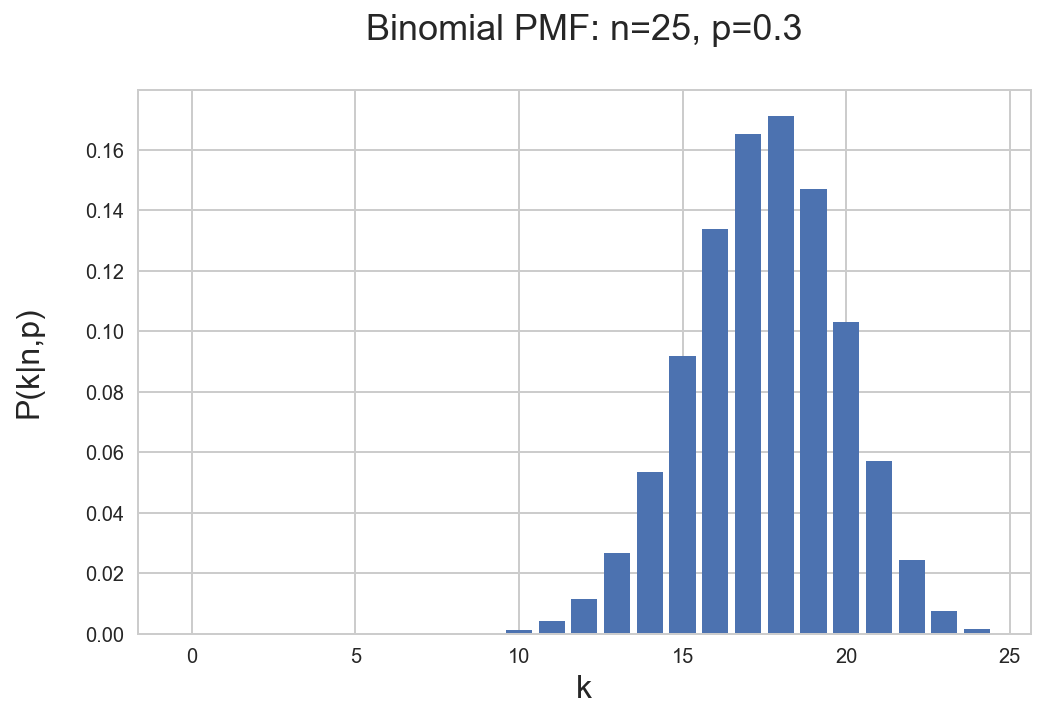

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
kvals = np.arange(0,25)
probs = binom.pmf(kvals)
ax.bar(kvals, probs)
ax.set_xlabel('k', fontsize=16)
ax.set_ylabel('P(k|n,p)\n', fontsize=16)
ax.set_title('Binomial PMF: n=25, p=0.3\n', fontsize=18)
plt.show()

If we change the probability of success $p$ (or if we wanted to the total trials $n$) we can see that the probability mass function changes - values of $k$ have different probabilities or likelihoods of occuring.

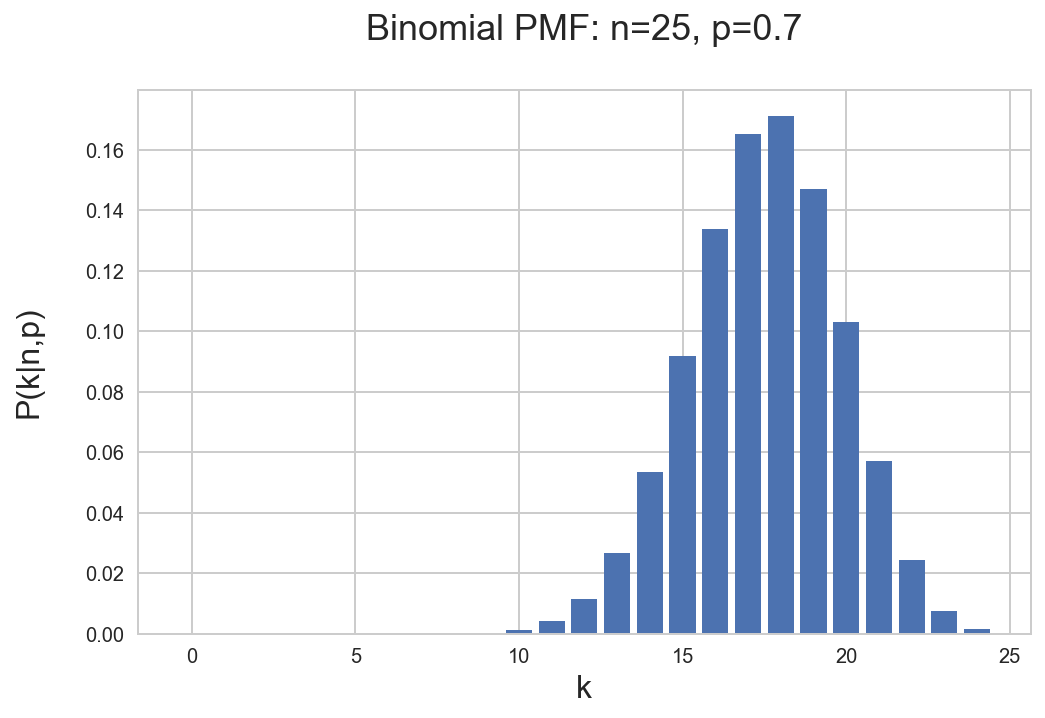

In [13]:
binom = stats.binom(25, 0.7)

fig, ax = plt.subplots(figsize=(8,5))
kvals = np.arange(0,25)
probs = binom.pmf(kvals)
ax.bar(kvals, probs)
ax.set_xlabel('k', fontsize=16)
ax.set_ylabel('P(k|n,p)\n', fontsize=16)
ax.set_title('Binomial PMF: n=25, p=0.7\n', fontsize=18)
plt.show()

---

### Modeling the parameter $p$ given successes and failures

Now let's reframe this. Say instead that we were measuring visitors to our site and also whether they chose to subscribe to our newsletter or not. So we redefine $n$, $k$, and $p$ accordingly:

### $$ \begin{aligned} n &= \text{number of visitors to our website} \\
k &= \text{number of visitors who subscribed} \\
p &= \text{probability of a visitor subscribing (unknown)} \end{aligned}$$

Remember, now we are _measuring_ $k$ subscribers out of the $n$ visitors. The measurement of subscribers can be considered our data.

At this point, we want to make an inference about the parameter $p$, our probability of a visitor subscribing. We can talk about this in terms of Bayes' Theorem:

### $$ P(p \;|\; data) = \frac{ P(data \;|\; p) }{ P(data) } P(p) $$

Or equivalently:

### $$ P(p \;|\; n,k) = \frac{ P(k \;|\; n,p) }{ P(k \;|\; n) } P(p) $$

Where we have:

### $$ \begin{aligned} 
P(p \;|\; n,k) &= \text{posterior} \\
P(k \;|\; n,p) &= \text{likelihood} \\
P(k \;|\; n) &= \text{marginal probability of the data} \\
P(p) &= \text{prior} 
\end{aligned} $$


---

### The Binomial Likelihood

Let's start with the likelihood. The likelihood represents the probability of observing $k$ successes out of $n$ trials _given a probability of success $p$._

This $p$ can be fixed, say at $p = 0.3$, in which case we would evaluate the likelihood at exactly that point. We could also represent $p$ as a distribution over the range of possible $p$ values. Like in the locomotive example, evaluating the likelihood at all of our different "hypotheses" about what $p$ could be. 

Let's start with a fixed value, $p = 0.3$. How do we evaluate the likelihood? As it turns out the likelihood function is the same as the probability mass function we wrote above, because this function is literally used to evaluate "what is the probability of $k$ successes given $n$ trials and $p$ probability of success". This is what we have formulated as the likelihood in the numerator.

So we can use the binomial object initialized with $p = 0.3$ and $n = 25$ to find the likelihood value for a given $k$.

In [14]:
n, p = 25, 0.3
binom = stats.binom(n, p)
print 'P(5 successes):', binom.pmf(5)
print 'P(10 successes):', binom.pmf(10)
print 'P(20 successes):', binom.pmf(20)

P(5 successes): 0.103016523534
P(10 successes): 0.0916360123832
P(20 successes): 3.11354473777e-07


---

### Maximum Likelihood Estimation (MLE)

If we were to _just_ consider the likelihood part of Bayes Theorem, we could ask "what is the value of the parameter $p$ that maximizes the value of the likelihood function?" This is precisely what we do in Frequentist statistics to find our point estimate of a parameter. 

Remember that frequentists have no interest in the prior or posterior beliefs about the probability of the parameter's value. Frequentists state that there is no probability associated with a parameter such as the probability of subscription. There is one, _true_ probability of subscription if we were to measure the entire population. Because we only take a sample of people, we may by chance measure a probability of subscription that deviates from that true probability to some degree. In Frequentist statistics, it is the data that has a probability rather than the parameter!

For the binomial distribution, we can intuit immediately what the most likely value for $p$ is: it is going to be the fraction of successes that we measured in our data.

In [15]:
k = 7
print 'MLE(p):', float(k)/n

MLE(p): 0.28


But we can also derive the MLE more formally, which for distributions and models that are not so simple becomes necessary.

First, define the likelihood function $L$ (which is the same as the PMF):

### $$ L(k \;|\; n, p) = \binom{n}{k} p^k (1 - p)^{(n-k)} $$

Take the logarithm of this to get the log likelihood. The log likelihood has nice properties. It allows the computer do do computations with very small probabilities multiplied together. It also gets rid of our exponents, which makes the derivative easier.

### $$ LL(k \;|\; n, p) = ln\binom{n}{k} + k \cdot ln(p) + (n - k) \cdot ln(1 - p) $$

Now take the derivative of the log likelihood with respect to $p$ and set this to 0. This will find the value of $p$ that maximizes the log likelihood (the likelihood function is convex).

### $$ \begin{aligned}
\frac{\partial}{\partial p} LL(k \;|\; n, p) &= 0 \\
\frac{k}{p} - \frac{(n-k)}{(1-p)} &= 0 \\
\frac{(n-k)}{(1-p)} &= \frac{k}{p} \\
pn - pk &= k - pk \\
pn - pk + pk &= k \\
p = \frac{k}{n} \\
\end{aligned}$$

Now say instead we had $n = 5$ visitors to the site and to our surprise all of them subscribed, $k = 5$. Using the MLE for $p$ we would conclude that $p = 1.0$: a person has a %100 probability of subscribing when reaching our site.

Of course this is flawed due to the fact that we have only measured 5 people. If we took a Frequentist route, we would ask "what is the probability that we measured this parameter $p = 1.0$ by chance when in fact the true rate is (some predetermined null hypothesis value) $H0_p = 0.3$?" This would be our p-value, a.k.a. alpha or Type I error, and we would due to insufficient data fail to reject the null hypothesis.



---

### Bayesian modeling of the probability of $p$ and the Beta distribution

But we can take another approach to this. A Bayesian approach. Now instead of thinking about the data as having a probability we think of the parameter $p$ itself as having a probability, or in other words, different values of $p$ have different _likelihoods_. We will represent this with our prior distribution.

The distribution that represents _a distribution of probabilities_ is the Beta distribution. The beta distribution is parameterized by two values, $\alpha$ and $\beta$.

###  $$ Beta(\alpha, \beta) =
\begin{cases}
\alpha &= \text{number of successes + 1} \\
\beta &= \text{number of failures + 1}
\end{cases} $$

We can plot the beta distribution for the scenario where we measured $k = 5$ out of $n = 5$:

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


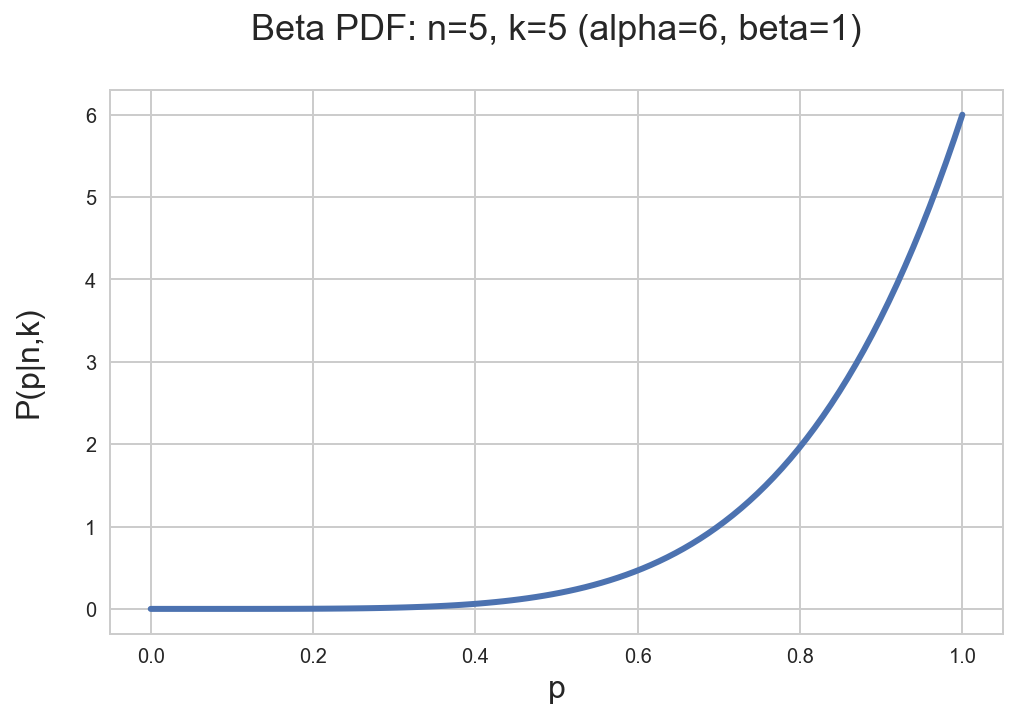

In [17]:
beta = stats.beta(5+1, 1)

p_values = np.linspace(0., 1., 100.)
probs = beta.pdf(p_values)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(p_values, probs, lw=3)
ax.set_xlabel('p', fontsize=16)
ax.set_ylabel('P(p|n,k)\n', fontsize=16)
ax.set_title('Beta PDF: n=5, k=5 (alpha=6, beta=1)\n', fontsize=18)
plt.show()

We can see from this distribution that our probability with the highest likelihood is 1.0. But, other probabilities are also likely tapering away from 1.0 towards 0.0. Because we have a low $n$, this essentially creates a fatter left tail away from $p = 1.0$. We will come back to this in a bit.

---

### The Beta PDF and the Beta function

This is all well and good, but how is the Beta distribution defined? Formally, we can define the probability density function of the beta distribution as:

### $$ PDF_{Beta}(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{\int_0^1 u^{\alpha-1} (1-u)^{\beta-1}\, du} $$

Where $x$ falls in the range [0, 1], and $u$ represents the values in that range to integrate over.

In the denominator, we are integrating over the possible probabilities. The denominator of the PDF is actually called the "Beta function", not to be confused with the Beta _distribution_. The beta function is, of course, used to define the distribution though.

If this looks familiar to the equation for the binomial likelihood above, it's because it is. In the numerator we essentially have the binomial likelihood equation but with the "shape" parameters $\alpha$ and $\beta$ in place of our $k$ and $n$. In the denominator, we are integrating the binomial likelihood.


---

### The Gamma function

There is another way to write the beta distribution, using something called the "Gamma function". 

The gamma function is defined as:

###  $$ \Gamma(z) =
\begin{cases}
(z - 1)! &= \text{when z is a positive integer} \\
\int_0^{\infty} x^{z-1} e^{-x} dx &= \text{when z is a complex real number}
\end{cases} $$

We can plot out a gamma distribution below for say, $z = 10$

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


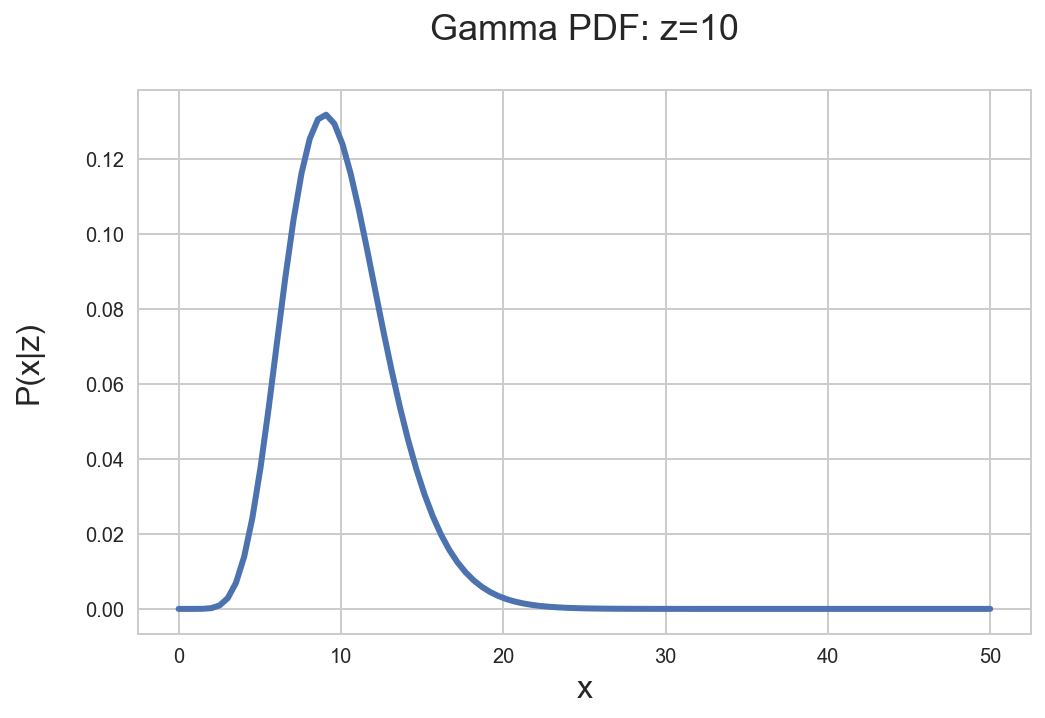

In [19]:
gamma = stats.gamma(10)

xvals = np.linspace(0., 50., 100.)
probs = gamma.pdf(xvals)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xvals, probs, lw=3)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('P(x|z)\n', fontsize=16)
ax.set_title('Gamma PDF: z=10\n', fontsize=18)
plt.show()

---

### Definining the Beta function using the Gamma function

The Gamma function is a generalization of the factorial function. The Beta _function_ can also be written in terms of the Gamma function:

### $$ Beta(\alpha, \beta) = \frac{ \Gamma (\alpha) \Gamma (\beta) }{\Gamma (\alpha + \beta) } = \int_0^1 u^{\alpha-1} (1-u)^{\beta-1}\, du $$

At this point, we can rewrite the Beta _distribution_, or probability density function, like so:

### $$ PDF_{Beta}(x) = \frac{\Gamma (\alpha + \beta) }{ \Gamma (\alpha) \Gamma (\beta) }x^{\alpha-1}(1-x)^{\beta-1} $$



---

### The Beta as a "conjugate prior" to the Binomial likelihood

So remember - our beta distribution is what we are going to be using as our _prior_ over the probability of subscribing $p$. In other words, we have some distribution of beliefs about which subscription rates are most likely as represented by a beta distribution, or beta probability density function.

Recall now the setup of this problem in terms of Bayes formula:

### $$ P(p \;|\; n,k) = \frac{ P(k \;|\; n,p) }{ P(k \;|\; n) } P(p) $$

Let's ignore the normalizing constant, the marginal probability of $k$, for now. We can say then the unnormalized posterior is:

### $$ P(p \;|\; n,k) = P(k \;|\; n,p) \cdot P(p) $$

And we can put our Binomial likelihood and the Beta posterior in where we had the placeholders:


### $$ P(p \;|\; n,k) = \binom{n}{k} p^k (1 - p)^{(n-k)} \cdot \frac{\Gamma (\alpha + \beta) }{ \Gamma (\alpha) \Gamma (\beta) }p^{\alpha-1}(1-p)^{\beta-1} $$

Let's now define a constant $c$ as:

### $$ c = \binom{n}{k} \cdot \frac{\Gamma (\alpha + \beta) }{ \Gamma (\alpha) \Gamma (\beta) } $$

Now our formula for the unnormalized posterior is:

### $$ \begin{aligned}
P(p \;|\; n,k) &= c \cdot p^k (1 - p)^{(n-k)} \cdot p^{\alpha-1}(1-p)^{\beta-1} \\
P(p \;|\; n,k) &= c \cdot p^{(k + \alpha - 1)} (1-p)^{(n - k + \beta - 1)}
\end{aligned}
$$

And if we define a new alpha and beta:

### $$ \begin{aligned}
\alpha_{posterior} &= k + \alpha_{prior} \\
\beta_{posterior} &= n - k + \beta_{prior}
\end{aligned} $$

We can see that the posterior distribution can in fact be parameterized as a Beta distribution. The constant term $c$ will be handled when we put the marginal likelihood back in and normalize the posterior distribution to be a proper probability distribution.